<a href="https://colab.research.google.com/github/LiliContreras/PSD_2024/blob/Manual_procesamiento/Manual_Procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install obspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 44.7 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
from scipy.integrate import cumtrapz

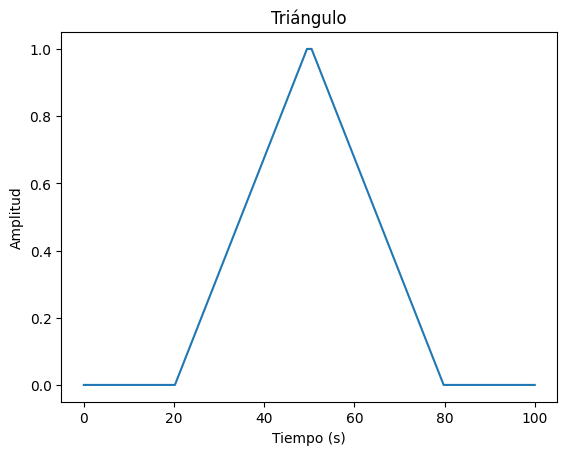

In [2]:
tiempo=np.linspace(0,100,100)
ti=np.zeros(20)
tf=np.zeros(20)
t1=np.linspace(0,1,30)
t2=np.linspace(1,0,30)
triangulo=np.concatenate((ti, t1, t2, tf))

# Graficar la señal
plt.plot(tiempo, triangulo)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Triángulo')
plt.show()

#Para manipulación de datos: # Crear un objeto Trace de ObsPy con los datos
tr = obspy.Trace(triangulo)


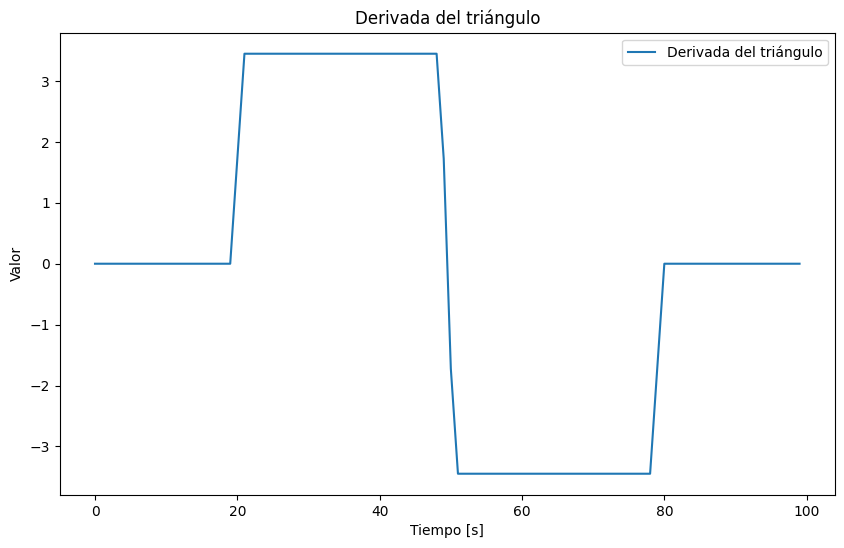

In [3]:
# Calcular la derivada utilizando diferencias finitas centradas
dt = 1.0 / len(triangulo)  # Paso de tiempo
derivada = np.gradient(triangulo, dt)

# Graficar la señal y su derivada
plt.figure(figsize=(10, 6))
#plt.plot(np.arange(len(triangulo)), triangulo, label='Triángulo')
plt.plot(np.arange(len(triangulo)), derivada, label='Derivada del triángulo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Derivada del triángulo')
plt.legend()
#plt.grid(True)
plt.show()

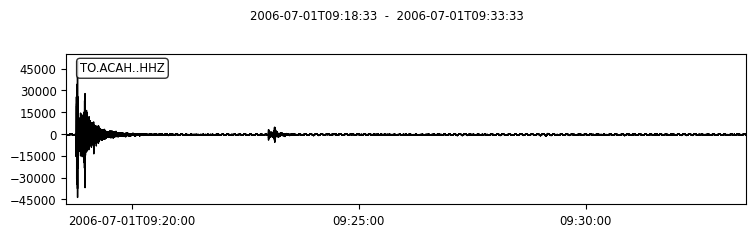

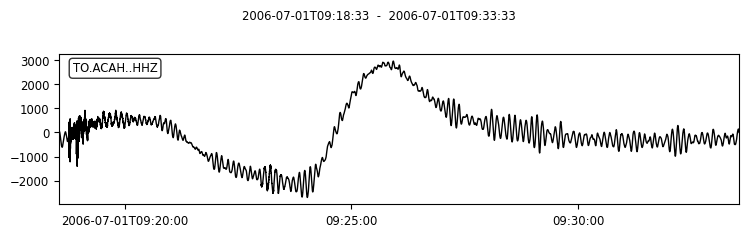

In [4]:
# 1. Abrir el archivo SAC
st = obspy.read("/content/ACAH.HHZ.sac")

# 2. Graficar la señal
st.plot()

# Aplicar rmean y rtrend (eliminar media y tendencia lineal)
st.detrend('linear')

# 3. Calcular la integral de la señal
integrated_signal = st.integrate()

# 4. Graficar la señal integrada
integrated_signal.plot()

plt.show()

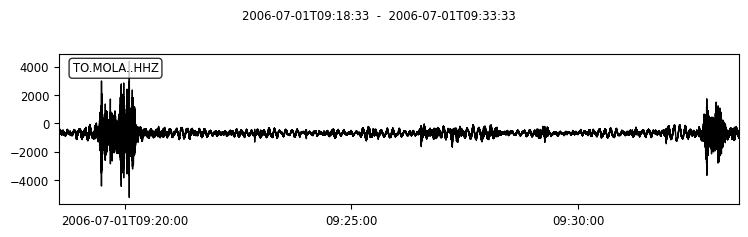

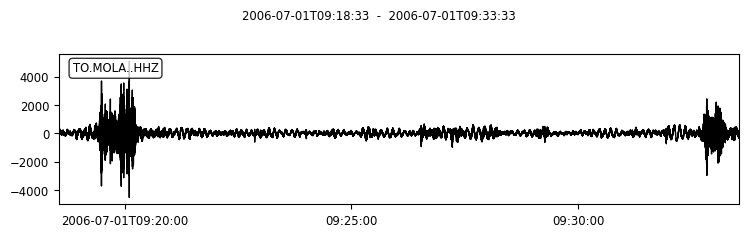

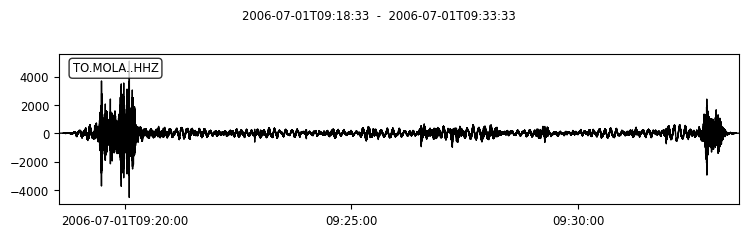

In [5]:
# 1. Abrir el archivo SAC
st = obspy.read("/content/MOLA.HHZ.sac")

# 2. Graficar la señal
st.plot()

# Aplicar rmean y rtrend (eliminar media y tendencia lineal)
st.detrend('linear')

# 2. Graficar la señal
st.plot()

# 3. Aplicar un taper con una ventana de 5% de la duración total de la señal
st.taper(max_percentage=0.05, type='hann')

# 4. Graficar la señal integrada
st.plot()

plt.show()

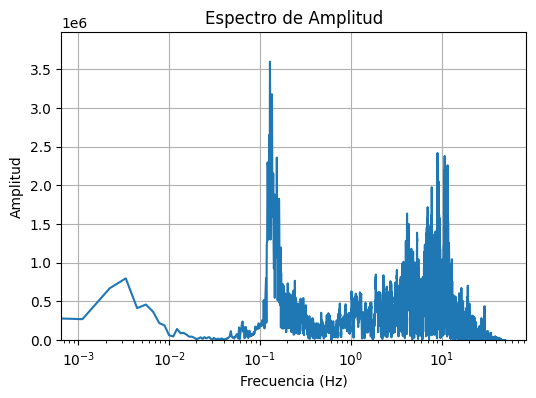

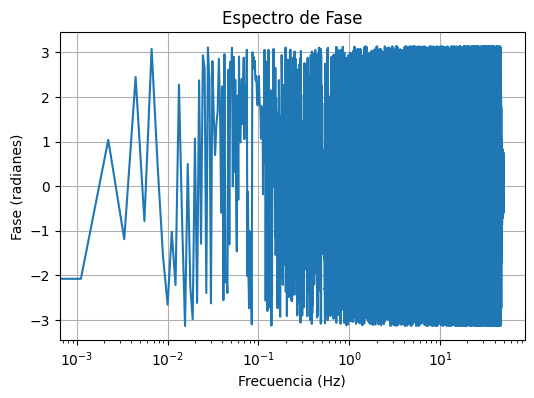

In [20]:
# Leer el archivo SAC
st = obspy.read("/content/ACAH.HHZ.sac")

# Obtener la señal y la información de muestreo
traza = st[0]
data = traza.data
sampling_rate = traza.stats.sampling_rate
npts = traza.stats.npts

# Calcular la transformada de Fourier
fft_signal = np.fft.fft(data)
freq = np.fft.fftfreq(npts, d=1/sampling_rate)

# Calcular el espectro de amplitud
amplitude_spectrum = np.abs(fft_signal)

# Calcular el espectro de fase
phase_spectrum = np.angle(fft_signal)

# Graficar el espectro de amplitud
plt.figure(figsize=(6, 4))
plt.semilogx(freq[:len(freq)//2], amplitude_spectrum[:len(freq)//2])
plt.title('Espectro de Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.ylim([0, 10**6.6])
plt.grid(True)
plt.show()

# Graficar el espectro de fase
plt.figure(figsize=(6, 4))
plt.semilogx(freq[:len(freq)//2], phase_spectrum[:len(freq)//2])
plt.title('Espectro de Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
#plt.xlim([0, 10**1])
plt.grid(True)
plt.show()

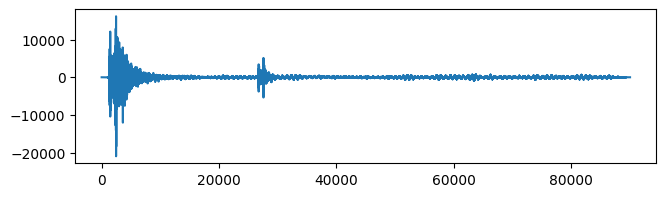

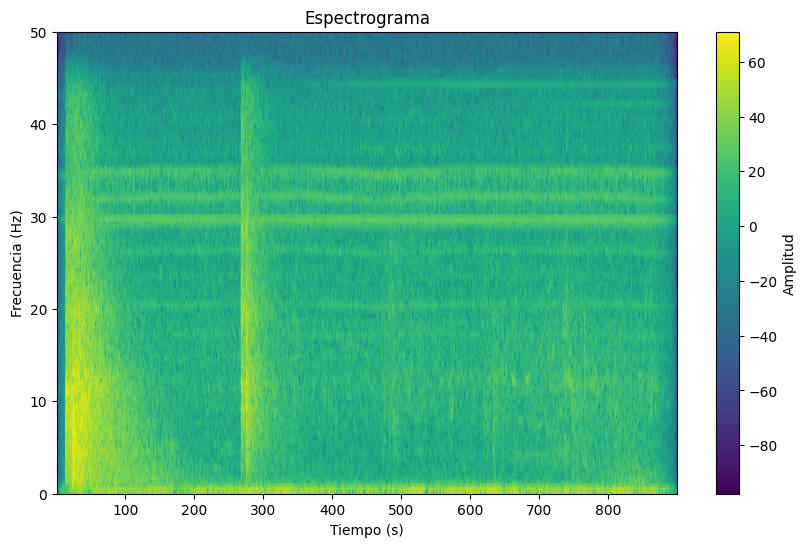

In [33]:
# Leer el archivo SAC
st = obspy.read("/content/ACAH.HHZ.sac")

st.detrend('linear')

st.taper(max_percentage=0.05, type='hann')

# Obtener la señal y la información de muestreo
trace = st[0]
data = trace.data
sampling_rate = trace.stats.sampling_rate

plt.figure(figsize=(7.5,2))
plt.plot(data)
plt.show()

# Calcular el espectrograma
plt.figure(figsize=(10, 6))
plt.specgram(data, Fs=sampling_rate)
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Amplitud')
plt.show()